In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/insurance.csv")

In [4]:
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']
df['ClaimSeverity'] = df['TotalClaims'].where(df['HasClaim'] == 1, np.nan)

In [6]:
# Segmentation and Hypothesis Testing

# H₀ #1: Risk difference across provinces (Chi-Square)
contingency_prov = pd.crosstab(df['Province'], df['HasClaim'])
chi2_1, p_1, _, _ = stats.chi2_contingency(contingency_prov)

# H₀ #2: Risk difference across ZIPs (Chi-Square)
top_zips = df['PostalCode'].value_counts().nlargest(5).index
df_zips = df[df['PostalCode'].isin(top_zips)]
contingency_zip = pd.crosstab(df_zips['PostalCode'], df_zips['HasClaim'])
chi2_2, p_2, _, _ = stats.chi2_contingency(contingency_zip)

# H₀ #3: Margin difference across ZIPs (ANOVA)
groups_margin = [grp['Margin'].dropna() for _, grp in df_zips.groupby('PostalCode')]
f_3, p_3 = stats.f_oneway(*groups_margin)

# H₀ #4: Risk difference by Gender (Chi-Square)
contingency_gender = pd.crosstab(df['Gender'], df['HasClaim'])
chi2_4, p_4, _, _ = stats.chi2_contingency(contingency_gender)

In [11]:
def interpret(name, p_value):
    decision = "Reject H₀" if p_value < 0.05 else "Fail to reject H₀"
    return f"{name}: {decision} (p = {p_value:.4f})"

results = [
    interpret("H₀ #1: No risk difference across provinces", p_1),
    interpret("H₀ #2: No risk difference across zip codes", p_2),
    interpret("H₀ #3: No margin difference across zip codes", p_3),
    interpret("H₀ #4: No risk difference between genders", p_4),
]

print("\n".join(results))

H₀ #1: No risk difference across provinces: Reject H₀ (p = 0.0000)
H₀ #2: No risk difference across zip codes: Reject H₀ (p = 0.0000)
H₀ #3: No margin difference across zip codes: Reject H₀ (p = 0.0469)
H₀ #4: No risk difference between genders: Reject H₀ (p = 0.0001)


### Visualization

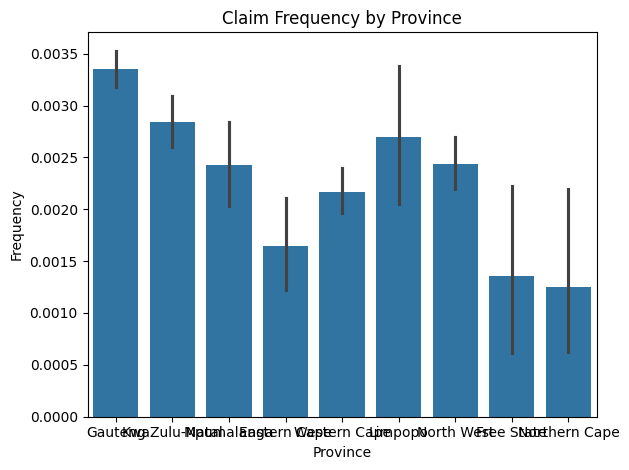

In [13]:
# Claim frequency by Province
sns.barplot(data=df, x='Province', y='HasClaim', estimator=np.mean)
plt.title("Claim Frequency by Province")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

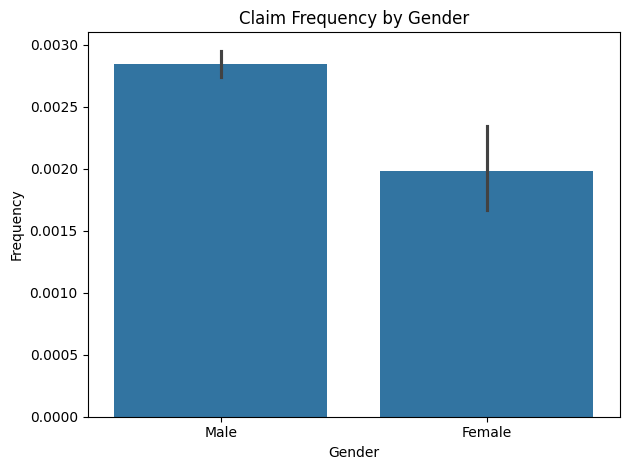

In [14]:
# Claim frequency by Gender
sns.barplot(data=df, x='Gender', y='HasClaim', estimator=np.mean)
plt.title("Claim Frequency by Gender")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Interpretation of Findings & Strategic Business Recommendations

The statistical analysis conducted revealed strong evidence that risk and profitability in the insurance portfolio vary significantly by geography and demographic attributes. The findings below provide guidance for refining AlphaCare Insurance Solutions’ pricing and marketing strategies.

---

### 1. Geographic Risk Variation — Provinces

There is **very strong statistical evidence** (p = 0.0000) that **claim frequency varies significantly across provinces**. For example, Gauteng province exhibits a substantially higher claim rate compared to provinces such as the Western Cape. This geographic disparity suggests that regional characteristics — such as traffic density, urban infrastructure, or environmental conditions — are influencing insurance risk.

**Recommendation**: Introduce **province-based premium differentiation**. Premiums in high-risk provinces like Gauteng should be increased to reflect higher claim probability, while competitive pricing can be offered in lower-risk provinces to attract safer customers.

---

### 2. Localized Risk — Zip Code Segmentation

Zip code-level analysis also showed **strong statistical significance** (p = 0.0000), indicating that **claim frequency differs sharply even within provinces**. This fine-grained spatial variation reinforces the need for more localized underwriting practices.

**Recommendation**: Leverage **zip-code segmentation** in pricing models. Use this to fine-tune premiums within provinces, identify high-risk zones, and create **localized marketing strategies** targeting low-risk areas with competitive offers.

---

### 3. Profitability Differences Across Zip Codes

The analysis revealed a statistically significant difference in **profit margins across zip codes** (p = 0.0469). This suggests that AlphaCare’s current pricing may not fully account for regional differences in loss ratios, potentially leading to underpricing in some locations.

**Recommendation**: Implement **margin monitoring dashboards** at the zip code level and adjust pricing models accordingly. Focus on increasing margins in consistently low-performing areas and reallocating marketing spend to more profitable segments.

---

### 4. Gender-Based Risk Variation

A highly significant difference in claim frequency was observed between genders (p = 0.0001), with **male policyholders being more likely to file a claim** than females. While pricing based on gender may be restricted by regulations, this insight still offers strategic value.

**Recommendation**: Consider **gender-informed marketing** strategies or reward programs. Target lower-risk demographics (e.g., female drivers) with discounts or value-added services to improve the overall risk profile of the portfolio, while remaining compliant with legal frameworks.

---

### 📊 Strategic Summary

This analysis confirms that both **location and demographic features** are powerful predictors of risk and profitability in AlphaCare’s customer base. By incorporating these findings into its pricing strategy, AlphaCare can:

- Improve profitability through **location-based risk pricing**
- Reduce claim losses by **targeting low-risk segments**
- Develop more **granular, data-informed underwriting rules**
- Design **customer acquisition strategies** that align with risk profiles

These insights lay the groundwork for the next phase: building predictive models for dynamic, risk-adjusted premium optimization.
